In [52]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np

In [84]:
births=pd.read_csv("births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [85]:
births.shape

(15547, 5)

In [86]:
births['decade']=10*(births['year']//10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [87]:
births.pivot_table(index='decade',columns="gender",aggfunc=sum)

births                day           month            year         
gender         F         M        F        M      F      M        F        M
decade                                                                      
1960     1753634   1846572   7140.0   7140.0   2496   2496   756096   756096
1970    16263075  17121550  69896.0  69710.0  24828  24832  7524768  7516855
1980    18310351  19243452  56976.0  56877.0  21842  21845  6652359  6650377
1990    19479454  20420553      0.0      0.0    780    780   239340   239340
2000    18229309  19106428      0.0      0.0    702    702   216432   216432

In [88]:
# for only births i wanna see average data of this group
births.pivot_table('births',index='decade',columns="gender",aggfunc=sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Total births per year')

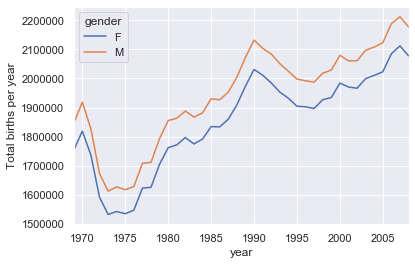

In [89]:
sns.set()
births.pivot_table('births',index='year',columns='gender',aggfunc=sum).plot()
pl.ylabel('Total births per year')

In [90]:
# we can also group like this as above
data=births.groupby(['year','gender'])['births'].sum().unstack()

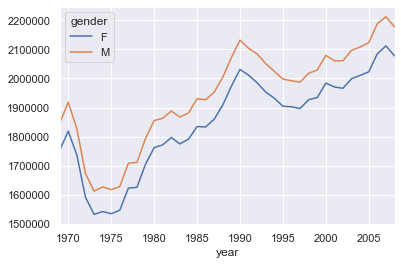

In [91]:
data.plot()

In [92]:
data.head()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


In [93]:
quartiles=np.percentile(births['births'],[15,50,75])
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])
print(quartiles)
sig

[4152.  4814.  5289.5]


841.75

In [94]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [95]:
births['day']=births['day'].astype(int)
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [96]:
births.index=pd.to_datetime(10000*births.year+
                            100*births.month+
                            births.day,format='%Y%m%d')
births['Dayofweek']=births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,Dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


decade,1960,1970,1980
Dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


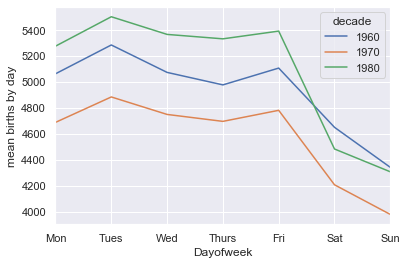

In [114]:
a=births.pivot_table('births',index='Dayofweek',
                columns='decade')
a.plot()
pl.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
pl.ylabel('mean births by day');
a

In [116]:
births_by_date=births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625